In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tabulate
import networkx as nx
from random import random as rand
import itertools

1. Visualizacion del dataset. En este caso con los valores de bhk, rent y size vamos a predecir el furnishing_status.
Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/?select=House_Rent_Dataset.csv

In [118]:
np.random.seed(1)
casas : pd.DataFrame = pd.read_csv("House_Rent_Dataset.csv")
casas.columns = [c.lower().replace(' ', '_') for c in casas.columns]
casas.dtypes
casas

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


Funciones

**Funcion Sigmoideal**, esta funcion es la mas comun entre las funciones de activacion, y consiste en que  si el valor de x va a infinito positivo, entonces el valor predicho de Y se convertirá en 1 y si va a infinito negativo, entonces el valor predicho de Y se convertirá en 0.

**Gradient Descent**, En este caso la derivativa de la sigmoide, es un algoritmo de optimizacion para encontrar el minimo/maximo local de una funcion(en este caso es sigmoide).

In [119]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

Visualizacion de funcion sigmoide

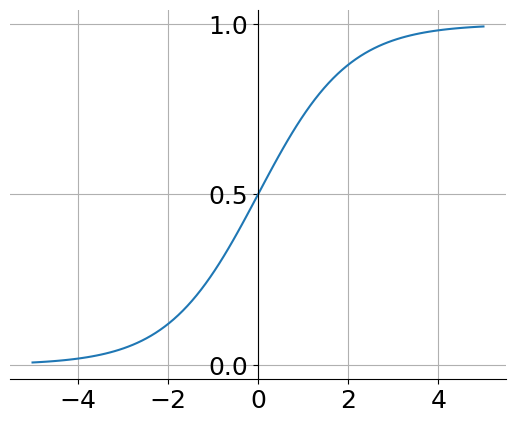

In [120]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

Setup
Asignacion de valores training de inputs y outputs

**Input Layer**, es la primera capa que consiste de neuronas de entrada o inputs que pueden ser de una imagen, dataset, etc. En nuestro caso son 3 valores numericos.

**Output Layer**, esta es la capa de salida, en nuestro caso consiste de una neurona, esta tendra una prediccion que tirara el modelo con respecto a los valores usados.

In [121]:
le = preprocessing.LabelEncoder()
le.fit(casas.furnishing_status)#encodearemos a un valor numerico

N_cols = ['rent', 'size' ,'bhk']
X = casas[N_cols].values

y = le.transform(casas.furnishing_status)

X_train = X
y_train = y

training_inputs = X_train

training_outputs = np.array([y_train]).T

display(training_inputs)
display(training_outputs)

array([[10000,  1100,     2],
       [20000,   800,     2],
       [17000,  1000,     2],
       ...,
       [35000,  1750,     3],
       [45000,  1500,     3],
       [15000,  1000,     2]])

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [2]])

In [122]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

10000,1100,2,2
20000,800,2,1
17000,1000,2,1
10000,800,2,2
7500,850,2,2
7000,600,2,2
10000,700,2,2
5000,250,1,2
26000,800,2,2
10000,1000,2,1
25000,1200,3,1


In [123]:
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((3, 1)) - 1

synaptic_weights

array([[1.417022  ],
       [1.72032449],
       [1.00011437]])

In [124]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

**Forward Propagation**, este es el proceso por el cual una red neuronal envía su entrada a través de sus capas hacia la salida.

**Backward Propagation**, despues de ser enviadas las inputs, este proceso calcula el margen de error, ajusta los pesos en funcion a este y los manda mediante las capas de la red.

In [125]:
# 10000 epochs
for iteration in range(10000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [126]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[1.417022  ]
 [1.72032449]
 [1.00011437]]
Outputs after training: 
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [127]:
table(training_values)

10000,1100,2,2
20000,800,2,1
17000,1000,2,1
10000,800,2,2
7500,850,2,2
7000,600,2,2
10000,700,2,2
5000,250,1,2
26000,800,2,2
10000,1000,2,1
25000,1200,3,1


In [128]:
large = lambda x : display(HTML(''+str(x)+''))

In [129]:
a = 3000 #@param {type:"integer"}
c = 2000 #@param {type:"integer"}
b = 3 #@param {type:"integer"}

input_layer = np.array([a, b, c])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

1.0

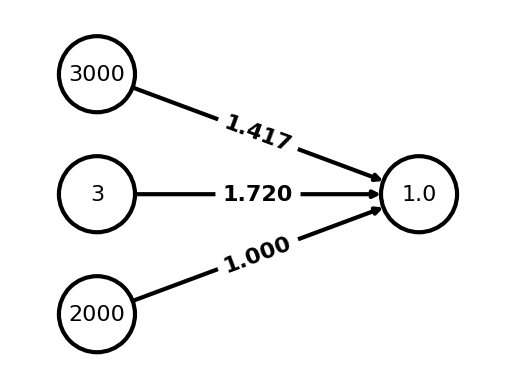

In [130]:
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer)}
labels[3] = round(res, 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()